In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\\bnola\\Documents\\Coding practice\\2018-2019 NHL Stats+Salary.xlsx")

In [3]:
data

,PLAYER,TEAM,AGE,POS,HANDED,GP,G,A,P,P/GP,+/-,Sh,Sh%,TOI,CAP HIT,SALARY
0,1. Zdeno Chara,BOS,41,LD,Left,62,5,9,14,0.23,22,99,0.05,21:04:00,5000000,5000000
1,2. Marián Hossa,ARI,39,RW,Left,0,0,0,0,0,0,0,0,NaN,5275000,1000000
2,3. Joe Thornton,SJS,38,C,Left,73,16,35,51,0.7,8,90,0.18,15:32:00,5000000,5000000
3,4. Johan Franzen,DET,38,"RW, LW",Left,0,0,0,0,0,0,0,0,NaN,3954545,1000000
4,5. Ryan Miller,ANA,37,G,Left,20,-,-,-,-,-,-,-,-,2000000,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496. Sean Kuraly,BOS,25,"C, LW",Left,71,8,13,21,0.3,6,134,0.06,13:46:00,1275000,1300000
496,497. Matt Puempel,DET,25,LW,Left,8,1,0,1,0.13,-2,10,0.1,10:24:00,675000,650000
497,498. Rocco Grimaldi,NSH,25,"LW, RW",Right,53,5,8,13,0.25,-2,81,0.06,10:00:00,650000,650000
498,499. Dillon Simpson,CBJ,25,LD,Left,0,0,0,0,0,0,0,0,NaN,675000,650000


In [4]:
df = data.dropna(axis=0, how='any')

In [5]:
players = df.mask(df.POS == 'G')
players = players.dropna(axis=0, how='any')

In [6]:
players = players.drop(['TOI', 'CAP HIT'], axis=1)

In [7]:
Y = players['SALARY'].values

In [8]:
Y = Y/1000000.000

In [9]:
X = players.drop(['PLAYER','TEAM', 'POS', 'HANDED', 'Sh', 'SALARY'], axis=1).values

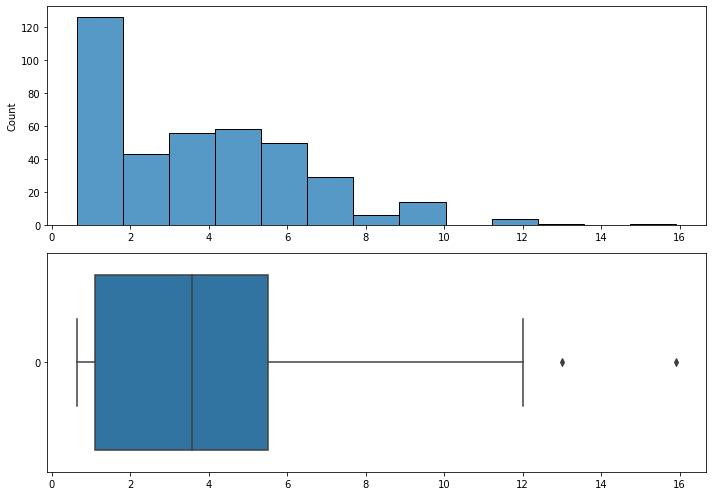

In [10]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(data=Y)
fig.add_subplot(2,1,2)
sns.boxplot(data=Y, orient='h')
plt.tight_layout()

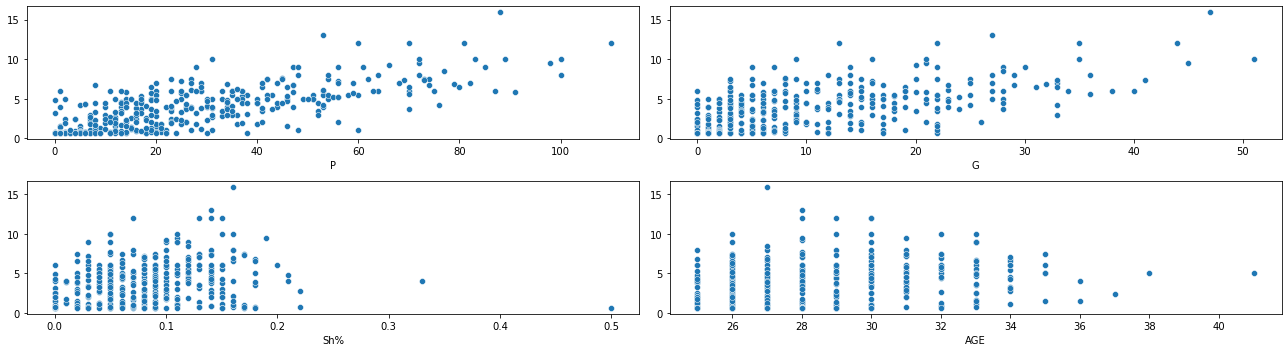

In [11]:
fig = plt.figure(figsize=(18,5));
fig.add_subplot(2,2,1)
sns.scatterplot(x=players['P'],y= Y)
fig.add_subplot(2,2,2)
sns.scatterplot(x=players['G'],y= Y)
fig.add_subplot(2,2,3)
sns.scatterplot(x=players['Sh%'],y= Y)
fig.add_subplot(2,2,4)
sns.scatterplot(x=players['AGE'],y= Y);
fig.tight_layout()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

3.618083618556701
[ 0.56329708  0.18668899  0.15860613  0.4229836   0.33727363  1.25889167
 -0.22494565 -0.46830259]


In [15]:
y_pred_reg = regressor.predict(X_test)

In [16]:
coeff_df = pd.DataFrame(regressor.coef_, players.drop(['PLAYER','TEAM', 'POS', 'HANDED', 'Sh', 'SALARY'], axis=1).columns, columns=['Coefficient'])
coeff_df

,Coefficient
AGE,0.563297
GP,0.186689
G,0.158606
A,0.422984
P,0.337274
P/GP,1.258892
+/-,-0.224946
Sh%,-0.468303


<Figure size 720x360 with 0 Axes>

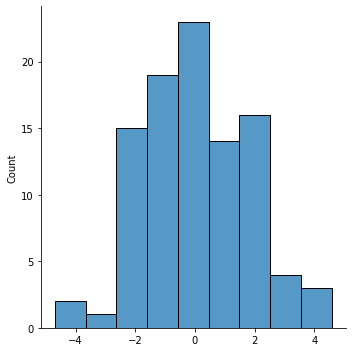

In [17]:
fig = plt.figure(figsize=(10,5));
resids = (Y_test - y_pred_reg)
sns.displot(resids);

In [26]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,6.00,3.228608
1,2.10,2.408085
2,0.95,1.572587
3,2.00,3.666814
4,0.65,1.210601
5,2.00,2.149070
6,3.75,3.721188
7,2.35,2.849395
8,1.10,3.908702
9,4.50,6.073281


In [27]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

MAE: 1.4019234205184368
MSE: 2.998895095196835
RMSE: 1.7317318196524643
VarScore: 0.6307704454270562


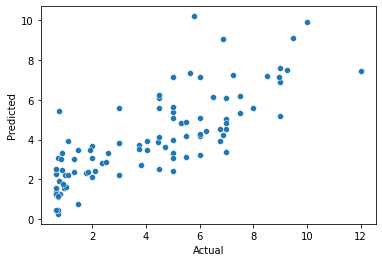

In [19]:
sns.scatterplot(x = df['Actual'], y = df['Predicted']);

In [23]:
model = keras.Sequential([keras.layers.Dense(8, activation='relu'), 
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1)])
model.compile(loss='mse',
                optimizer='Adam')
history = model.fit(x=X_train, y=Y_train, batch_size=30, epochs=100, validation_data=(X_test, Y_test))
y_pred = model.predict(X_test)

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 24.2321 - val_loss: 28.5736
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 23.0652 - val_loss: 27.4961
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 22.1235 - val_loss: 26.7069
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 21.4043 - val_loss: 26.0319
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 20.8005 - val_loss: 25.4260
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 20.2351 - val_loss: 24.9168
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 19.7965 - val_loss: 24.5113
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 19.4373 - val_loss: 24.1555
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 19.0835 - val_loss: 23.7876
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 18.7226 - val_lo

MAE: 1.3954994986229337
MSE: 3.0807668019327235
RMSE: 1.755211326858599
VarScore: 0.6319310853253629


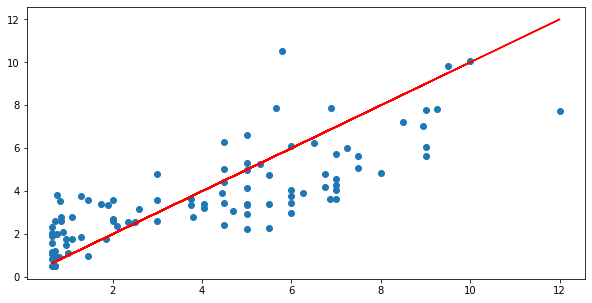

In [24]:
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred)
plt.plot(Y_test,Y_test,'r')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

<AxesSubplot:>

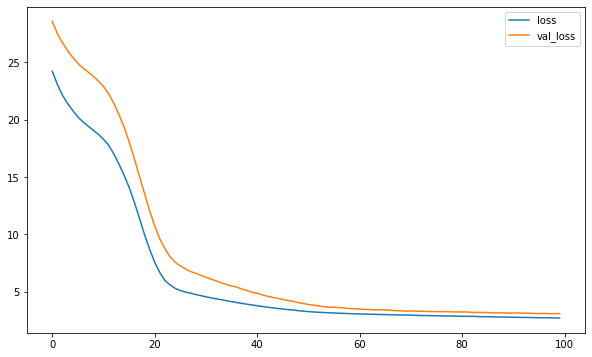

In [25]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(10,6))